<a href="https://colab.research.google.com/github/Kylapurity/Participation_Assignment/blob/main/Participation_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow_datasets as tfds
ds = tf.keras.datasets.mnist.load_data()
# Display some benchmark statistics
tfds.benchmark(ds, batch_size=32)
# Second iteration is much faster, due to auto-caching
tfds.benchmark(ds, batch_size=32)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

************ Summary ************



  0%|          | 0/2 [00:00<?, ?it/s]

Examples/sec (First included) 802.80 ex/sec (total: 96 ex, 0.12 sec)
Examples/sec (First only) 267.61 ex/sec (total: 32 ex, 0.12 sec)
Examples/sec (First excluded) 20631850.42 ex/sec (total: 64 ex, 0.00 sec)

************ Summary ************



  0%|          | 0/2 [00:00<?, ?it/s]

Examples/sec (First included) 4299.70 ex/sec (total: 96 ex, 0.02 sec)
Examples/sec (First only) 1433.58 ex/sec (total: 32 ex, 0.02 sec)
Examples/sec (First excluded) 11825572.80 ex/sec (total: 64 ex, 0.00 sec)


,duration,num_examples,avg
first+lasts,0.022327,96,4.299700e+03
first,0.022322,32,1.433581e+03
lasts,0.000005,64,1.182557e+07


In [ ]:
# pre-processing the dataset for tf
(x_train, y_train), (x_test, y_test) = ds

In [ ]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
# buiding the model
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compiling and training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.8877 - loss: 0.3476 - val_accuracy: 0.9838 - val_loss: 0.0545
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9853 - loss: 0.0489 - val_accuracy: 0.9848 - val_loss: 0.0469
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9894 - loss: 0.0343 - val_accuracy: 0.9901 - val_loss: 0.0289
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9916 - loss: 0.0262 - val_accuracy: 0.9907 - val_loss: 0.0312
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9942 - loss: 0.0185 - val_accuracy: 0.9913 - val_loss: 0.0269
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9943 - loss: 0.0167 - val_accuracy: 0.9899 - val_loss: 0.0359
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9964 - loss: 0.0117 - val_accuracy: 0.9880 - val_loss: 0.0443
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9959 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 3s - 8ms/step - accuracy: 0.9928 - loss: 0.0299

Test accuracy: 0.9927999973297119


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 415,520 (1.59 MB)

 Trainable params: 138,506 (541.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 277,014 (1.06 MB)

In [ ]:
model.save('/content/model.keras')

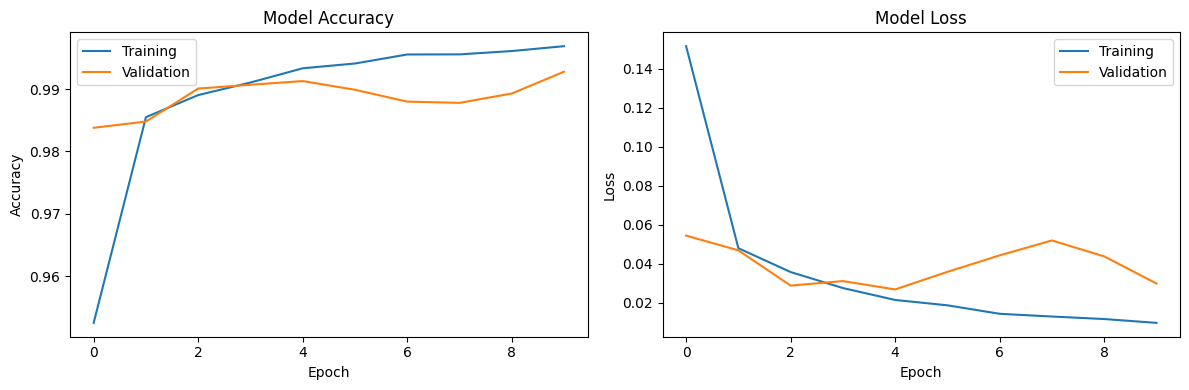

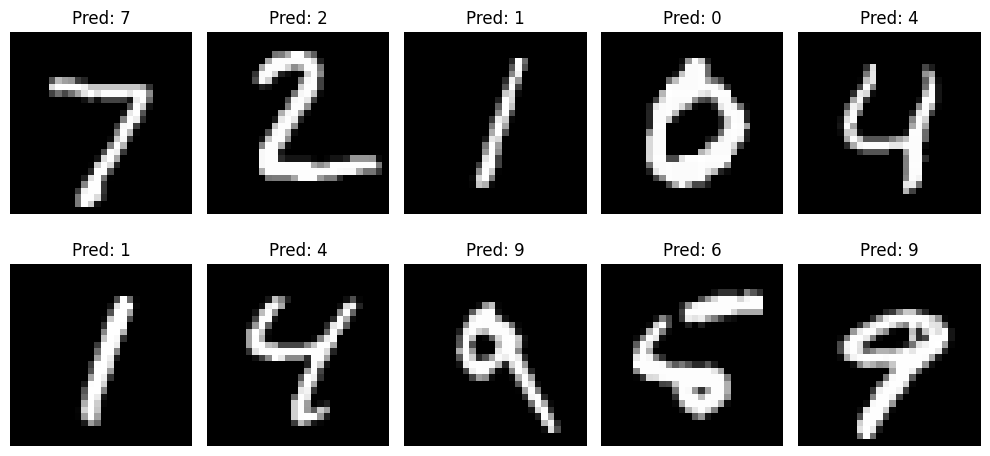

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Display sample predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred = model.predict(x_test[i:i+1], verbose=0)
    plt.title(f'Pred: {np.argmax(pred)}')
    plt.axis('off')
plt.tight_layout()
plt.show()